# Etapa 1: Setup de ambiente (caminhos e imports)

In [1]:
import sys
from pathlib import Path

# Adiciona o diretório src ao sys.path

In [2]:
ROOT = Path().resolve().parent  # você está dentro de /notebooks
SRC = ROOT / "src"
sys.path.append(str(SRC))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

In [4]:
from config import DATA_PATH
from features import criar_variaveis_derivadas

[OK] Configuração de diretórios concluída.


# Etapa 2: Carregamento e preparação dos dados

In [5]:

df = pd.read_csv(DATA_PATH)
df = criar_variaveis_derivadas(df)

X = df[[
    'Customer_Age', 'Dependent_count', 'Credit_Limit',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Ticket_Medio',
    'Gasto_Medio_Mensal', 'Rotativo_Ratio', 'Score_Relacionamento',
    'LTV_Proxy', 'Caiu_Valor', 'Caiu_Transacoes']]

y = df['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# Etapa 3: Treinamento do modelo

In [6]:

modelo = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=100, learning_rate=0.1, max_depth=4)
modelo.fit(X_train, y_train)


c:\Users\Iago\OneDrive\Desktop\Projeto Churn\Bank-Churn-Prediction-montes_claros\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [20:17:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


# Etapa 4: Avaliação do modelo

In [7]:

y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.89      0.78      0.83       488

    accuracy                           0.95      3039
   macro avg       0.92      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039

AUC: 0.9824


# Etapa 5: Matriz de Confusão

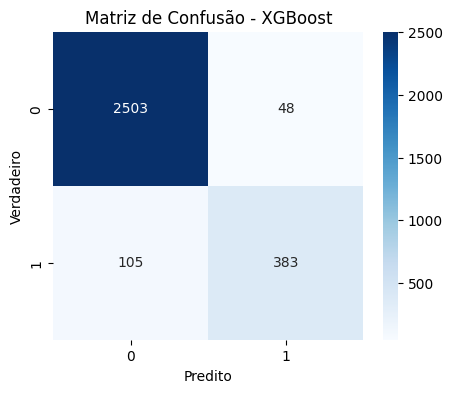

In [8]:

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


# Etapa 6: Curva ROC

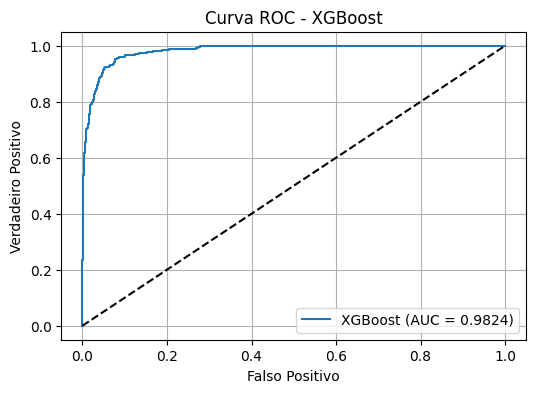

In [9]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC - XGBoost")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.legend()
plt.grid()
plt.show()
